In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.linear_model import LogisticRegression
import seaborn as sb

In [4]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)

In [5]:
X.shape

(1000, 2)

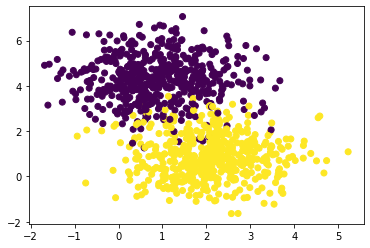

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)

In [7]:
model = LogisticRegression()

In [8]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
model.coef_

array([[ 0.78036486, -2.99192244]])

In [10]:
model.classes_

array([0, 1])

In [11]:
colors = ["Red", "Yellow", "Green", "Orange", "Black"]

In [12]:
y_col = [colors[item] for item in y]

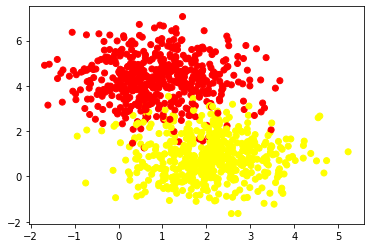

In [13]:
plt.scatter(X[:,0], X[:,1], c=y_col)

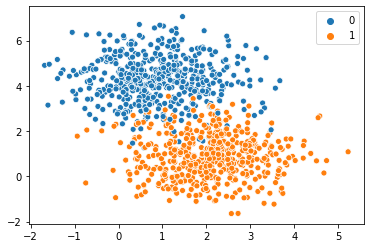

In [14]:
sb.scatterplot(X[:,0], X[:,1], hue=y)

(-10, 10)

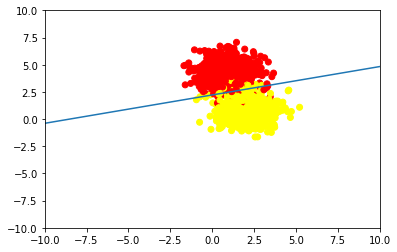

In [15]:
plt.scatter(X[:,0], X[:,1], c=y_col)

for [m1, m2], c in zip(model.coef_, model.intercept_):
    x1 = np.linspace(-10, 10, 2)
    x2 = (-m1/m2)*x1 -(c/m2) 
    
    plt.plot(x1, x2)
    
plt.xlim(-10, 10)
plt.ylim(-10,10)
    

In [34]:
class CustomLogisticReg:
    
    def __init__(self, lr=.01, iters=30):
        self.lr = lr
        self.iters = iters
        
    def fit(self, X, y):
        
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        
        self.theta_ = np.random.randn(X.shape[1], 1)
        
        errors = []
        
        for i in range(self.iters):
            error = self.gradient_decent(X, y)
            errors.append(error)
            
        return errors
            
    def gradient_decent(self, X, y):
        delta_theta, error = self.gradient(X, y)
        self.theta_ += delta_theta
        return error
        
    def gradient(self, X, y):
        ya =  y.reshape(-1, 1)
        yh = self.hypo(X)
        
        dneglldt = np.dot(X.T, (yh-ya)) / X.shape[0]
        
        delta_theta = -dneglldt * self.lr
        
        error = -np.mean((ya * np.log(yh)) + ((1-ya)*(np.log(1-yh))))
        
        return delta_theta, error
        
        
    def hypo(self, X):
        g = np.dot(X, self.theta_)
        return 1 / (1 + np.exp(-g))
    
    def predict(self, X):
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        result = self.hypo(X)
        return (result.flatten() > .5).astype(int)
    
    def score(self, X, y):
        yp = self.predict(X)
        
        return np.mean(yp == y)
        
        
        

In [35]:
model = CustomLogisticReg(iters=1000)

In [36]:
error = model.fit(X,y)

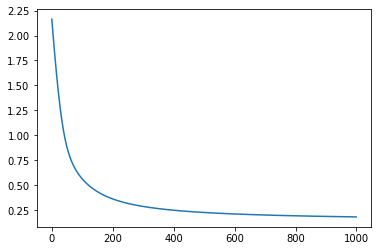

In [37]:
plt.plot(error)

In [38]:
model.score(X, y)

0.942

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [41]:
X.shape

(1000, 2)

In [42]:
X_train.shape

(670, 2)

In [43]:
errors = model.fit(X_train, y_train)

In [44]:
model.score(X_test, y_test)

0.9333333333333333